# Map Points Reduction <br>

**Authors:**
&nbsp;&nbsp;&nbsp;&nbsp;Abrar Akhyer Abir (abrarakhyer.abir@wsu.edu)<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Tashi Stirewalt (tashi.stirewalt@wsu.edu)

**School:**
&nbsp;&nbsp;&nbsp;&nbsp;Washington State University  
**Course:**
&nbsp;&nbsp;&nbsp;&nbsp;CPT_S 575 - Data Science

**Instructor:**
&nbsp;&nbsp;&nbsp;&nbsp;Dr. Assefaw Gebremedhin

**Date:**
&nbsp;&nbsp;&nbsp;&nbsp;11/2022

# Setup

Autoreload extension allows editing of .py source files by re-importing them into the notebook for easier editing and debugging.

*Source: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html*

In [1]:
%load_ext autoreload
%autoreload 2

Connect to relevant GoogleDrive files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
GOOGLE_DRIVE_PATH = os.path.join('drive/MyDrive/DataScience/SemesterProject')
print(os.listdir(GOOGLE_DRIVE_PATH))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['MapPointsReduction.ipynb', '.idea', '__pycache__', 'Data', 'location_data_generator.py', 'map_points_reduction.py', 'tester.py']


Import from GoogleDrive files

In [3]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Western"
time.tzset()

# Map Points Reduction (MPR) functions code file
import map_points_reduction as mpr
mpr_path = os.path.join(GOOGLE_DRIVE_PATH, 'map_points_reduction.py')
mpr_edit_time = time.ctime(os.path.getmtime(mpr_path))

# Location Data Generator (LDG) function code file
import location_data_generator as ldg
ldg_path = os.path.join(GOOGLE_DRIVE_PATH, 'location_data_generator.py')
ldg_edit_time = time.ctime(os.path.getmtime(ldg_path))

# Directory holding datasets
data_path = os.path.join(GOOGLE_DRIVE_PATH, 'Data')
data_edit_time = time.ctime(os.path.getmtime(data_path))

print(mpr_path, ' last edited on ', mpr_edit_time)
print(ldg_path, ' last edited on ', ldg_edit_time)
print(mpr_path, ' last edited on ', mpr_edit_time)

import pandas as pd  # for dataset loading

drive/MyDrive/DataScience/SemesterProject/map_points_reduction.py  last edited on  Tue Nov 29 00:37:42 2022
drive/MyDrive/DataScience/SemesterProject/location_data_generator.py  last edited on  Tue Nov 29 00:10:21 2022
drive/MyDrive/DataScience/SemesterProject/map_points_reduction.py  last edited on  Tue Nov 29 00:37:42 2022


Haversine formula to find distance between two points on a sphere.  
*SOURCE: https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/*

In [4]:
# SOURCE: https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/
import math
 
# Python 3 program for the haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Map Point Reduction Process

## 5k dataset

Create pandas Dataframe from relevant csv file.



In [5]:
locations5k_df = pd.read_csv(data_path + "/locations5k.csv")
print(type(locations5k_df))
print(locations5k_df)

<class 'pandas.core.frame.DataFrame'>
                              datetime  latitude  longitude
0     2016-03-29 22:14:42.999000+00:00  6.574026   3.372986
1     2016-03-29 22:18:11.123000+00:00  6.573953   3.372961
2            2016-03-29 22:45:13+00:00  6.574190   3.372775
3     2016-03-29 23:42:13.506000+00:00  6.577901   3.374130
4     2016-03-30 00:07:17.999000+00:00  6.574086   3.373014
...                                ...       ...        ...
4995  2017-01-18 13:48:58.854000+00:00  6.593210   3.361417
4996  2017-01-21 22:21:48.403000+00:00  6.574067   3.373023
4997         2017-01-22 00:11:01+00:00  6.573836   3.373036
4998         2017-01-22 00:34:39+00:00  6.574178   3.373101
4999  2017-01-22 01:47:37.866000+00:00  6.574086   3.372835

[5000 rows x 3 columns]


Find maximum range of values for "latitude" and "longitude".

In [6]:
data_df_5k = locations5k_df  # use given 5k location data

lat_max_5k = data_df_5k["latitude"].max()
lat_min_5k =  data_df_5k["latitude"].min()

lon_max_5k = data_df_5k["longitude"].max()
lon_min_5k =  data_df_5k["longitude"].min()

lat_max_range_5k = lat_max_5k - lat_min_5k
lon_max_range_5k = lon_max_5k - lon_min_5k

print("Maximum value ranges:")
print("Lat = ", lat_max_range_5k, "(min =", lat_min_5k, ", max =", lat_max_5k, ")")
print("Lon = ", lon_max_range_5k, "(min =", lon_min_5k, ", max =", lon_max_5k, ")")

Maximum value ranges:
Lat =  4.0973532 (min = 4.3835007 , max = 8.4808539 )
Lon =  5.017425599999999 (min = 3.0718008 , max = 8.0892264 )


In [7]:
approx_dist_5k = haversine(0, 0, lat_max_range_5k, lon_max_range_5k)
print("Approximate distance between fursthest possible points: ", approx_dist_5k, "km")

Approximate distance between fursthest possible points:  719.9380938860024 km


Determine possible grid size to use based on approximated furthest possible distance and desired number of grid cells overlaying.  

In [8]:
desired_number_cells_5k = 10 
recommended_grid_size_5k = approx_dist_5k / (desired_number_cells_5k + 1)
print("Recommended grid size: ", recommended_grid_size_5k, "km")

Recommended grid size:  65.44891762600022 km


Create instance of Map Points Reduction object with specified configuration (different config. = different results)

In [9]:
mpr_5k = mpr.MPR(kilometers=True, grid_size=recommended_grid_size_5k, equatorial_basis='equatorial', polar_basis='polar')
mpr_5k.printConfig()  # Print out configuration details for more specific information and for reference

------------------------------------------------------
MPR instance configuration details
------------------------------------------------------
Grid size:  65.44891762600022 km
Radius: ( equatorial  =  6378 km ,  polar  =  6357 km )
Delta lat:  0.5898925206338204  degrees
Delta lon:  0.5879502592770768  degrees
------------------------------------------------------


Perform the Map Points Reduction process and specify whether to plot result for checking/demonstration

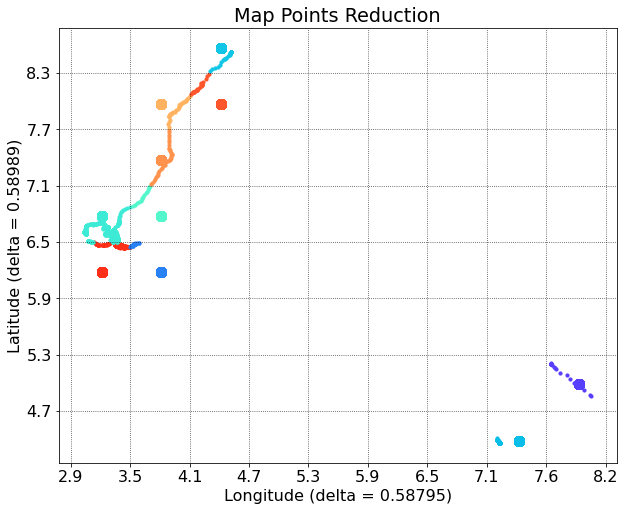

MAP POINTS REDUCTION RESULT:


In [10]:
result_5k = mpr_5k.mapPointReduce(data=data_df_5k, plot=True)
print("MAP POINTS REDUCTION RESULT:\n", mpr_5k)

## Full dataset

Create pandas Dataframe from relevant csv file.

In [11]:
locations_df_full = pd.read_csv(data_path + "/locations.csv")  # Locations (638573, 3)
print(type(locations_df_full))
print(locations_df_full)

<class 'pandas.core.frame.DataFrame'>
                                datetime   latitude   longitude
0       2016-03-29 22:14:42.999000+00:00   6.574026    3.372986
1       2016-03-29 22:18:11.123000+00:00   6.573953    3.372961
2              2016-03-29 22:45:13+00:00   6.574190    3.372775
3       2016-03-29 23:42:13.506000+00:00   6.577901    3.374130
4       2016-03-30 00:07:17.999000+00:00   6.574086    3.373014
...                                  ...        ...         ...
638568         2021-06-26 22:51:24+00:00  45.475159 -122.608483
638569  2021-06-27 00:24:35.034000+00:00  45.474889 -122.607049
638570  2021-06-27 00:32:13.997000+00:00  45.474868 -122.606672
638571  2021-06-27 00:35:25.038000+00:00  45.474817 -122.607636
638572  2021-06-27 00:39:53.842000+00:00  45.475449 -122.607397

[638573 rows x 3 columns]


Find maximum range of values for "latitude" and "longitude".

### NOTE: contains negative longitude value. There is currently a BUG causing incorrect plotting and maybe results whenever any negative lat or lon values are present.

In [12]:
data_df_full = locations_df_full  # use given the full location data

lat_max_full = data_df_full["latitude"].max()
lat_min_full =  data_df_full["latitude"].min()

lon_max_full = data_df_full["longitude"].max()
lon_min_full =  data_df_full["longitude"].min()

lat_max_range_full = lat_max_full - lat_min_full
lon_max_range_full = lon_max_full - lon_min_full

print("Maximum value ranges:")
print("Lat = ", lat_max_range_full, "(min =", lat_min_full, ", max =", lat_max_full, ")")
print("Lon = ", lon_max_range_full, "(min =", lon_min_full, ", max =", lon_max_full, ")")

Maximum value ranges:
Lat =  43.716847599999994 (min = 4.0125803 , max = 47.7294279 )
Lon =  237.10801070000002 (min = -122.7189855 , max = 114.3890252 )


In [13]:
approx_dist_full = haversine(0, 0, lat_max_range_full, lon_max_range_full)
print("Approximate distance between fursthest possible points: ", approx_dist_full, "km")

Approximate distance between fursthest possible points:  12577.28876607842 km


Determine possible grid size to use based on approximated furthest possible distance and desired number of grid cells overlaying.  

In [14]:
desired_number_cells_full = 10 
recommended_grid_size_full = approx_dist_full / (desired_number_cells_full + 1)
print("Recommended grid size: ", recommended_grid_size_full, "km")

Recommended grid size:  1143.389887825311 km


Create instance of Map Points Reduction object with specified configuration (different config. = different results)

In [15]:
mpr_full = mpr.MPR(kilometers=True, grid_size=recommended_grid_size_full, equatorial_basis='equatorial', polar_basis='polar')
mpr_full.printConfig()  # Print out configuration details for more specific information and for reference

------------------------------------------------------
MPR instance configuration details
------------------------------------------------------
Grid size:  1143.389887825311 km
Radius: ( equatorial  =  6378 km ,  polar  =  6357 km )
Delta lat:  10.305397972365416  degrees
Delta lon:  10.271466746680298  degrees
------------------------------------------------------


Perform the Map Points Reduction process and specify whether to plot result for checking/demonstration

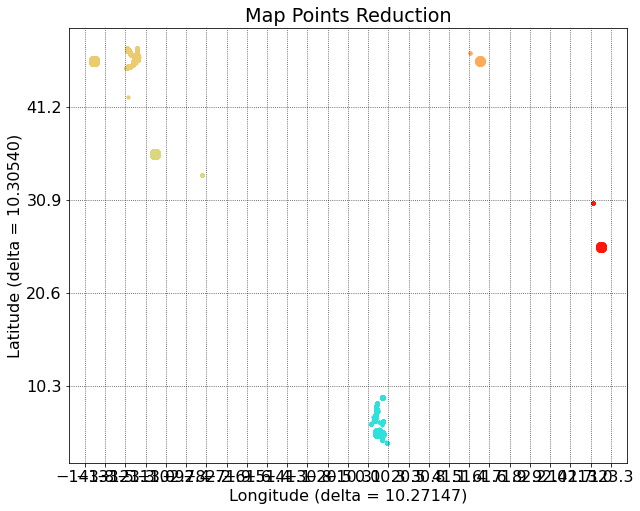

MAP POINTS REDUCTION RESULT:
                                 datetime   latitude   longitude    lat_mid  \
0       2016-03-29 22:14:42.999000+00:00   6.574026    3.372986   5.135733   
1       2016-03-29 22:18:11.123000+00:00   6.573953    3.372961   5.135733   
2              2016-03-29 22:45:13+00:00   6.574190    3.372775   5.135733   
3       2016-03-29 23:42:13.506000+00:00   6.577901    3.374130   5.135733   
4       2016-03-30 00:07:17.999000+00:00   6.574086    3.373014   5.135733   
...                                  ...        ...         ...        ...   
638568         2021-06-26 22:51:24+00:00  45.475159 -122.608483  46.221600   
638569  2021-06-27 00:24:35.034000+00:00  45.474889 -122.607049  46.221600   
638570  2021-06-27 00:32:13.997000+00:00  45.474868 -122.606672  46.221600   
638571  2021-06-27 00:35:25.038000+00:00  45.474817 -122.607636  46.221600   
638572  2021-06-27 00:39:53.842000+00:00  45.475449 -122.607397  46.221600   

           lon_mid  
0         5.

In [16]:
result_full = mpr_full.mapPointReduce(data=data_df_full, plot=True)
print("MAP POINTS REDUCTION RESULT:\n", result_full)

## Random dataset 1

Find maximum range of values for "latitude" and "longitude".

### **NOTE!** Bugged midpoint plotting whenever dataset contains negative lat/lon values, seems to be working correctly otherwise. Midpoints somehow shifted to offset position from looking at plot result. Will try to address bug this coming weekend. 

In [17]:
data_df_r1 = ldg.generateLocationData(number=1000, min_lat=0, max_lat=90, min_lon=0, max_lon=180)  

lat_max_r1 = data_df_r1["latitude"].max()
lat_min_r1 =  data_df_r1["latitude"].min()

lon_max_r1 = data_df_r1["longitude"].max()
lon_min_r1 =  data_df_r1["longitude"].min()

lat_max_range_r1 = lat_max_r1 - lat_min_r1
lon_max_range_r1 = lon_max_r1 - lon_min_r1

print("Maximum value ranges:")
print("Lat = ", lat_max_range_r1, "(min =", lat_min_r1, ", max =", lat_max_r1, ")")
print("Lon = ", lon_max_range_r1, "(min =", lon_min_r1, ", max =", lon_max_r1, ")")

Maximum value ranges:
Lat =  89.98403251553835 (min = 0.011028931019552157 , max = 89.9950614465579 )
Lon =  179.9646805089912 (min = 0.023460809631763446 , max = 179.98814131862295 )


In [18]:
approx_dist_r1 = haversine(0, 0, lat_max_range_r1, lon_max_range_r1)
print("Approximate distance between fursthest possible points: ", approx_dist_r1, "km")

Approximate distance between fursthest possible points:  10009.318900936352 km


Determine possible grid size to use based on approximated furthest possible distance and desired number of grid cells overlaying.  

In [19]:
desired_number_cells_r1 = 10 
recommended_grid_size_r1 = approx_dist_r1 / (desired_number_cells_r1 + 1)
print("Recommended grid size: ", recommended_grid_size_r1, "km")

Recommended grid size:  909.9380819033048 km


Create instance of Map Points Reduction object with specified configuration (different config. = different results)

In [20]:
mpr_r1 = mpr.MPR(kilometers=True, grid_size=recommended_grid_size_r1, equatorial_basis='equatorial', polar_basis='polar')
mpr_r1.printConfig()  # Print out configuration details for more specific information and for reference

------------------------------------------------------
MPR instance configuration details
------------------------------------------------------
Grid size:  909.9380819033048 km
Radius: ( equatorial  =  6378 km ,  polar  =  6357 km )
Delta lat:  8.201291758893943  degrees
Delta lon:  8.174288446423455  degrees
------------------------------------------------------


Perform the Map Points Reduction process and specify whether to plot result for checking/demonstration

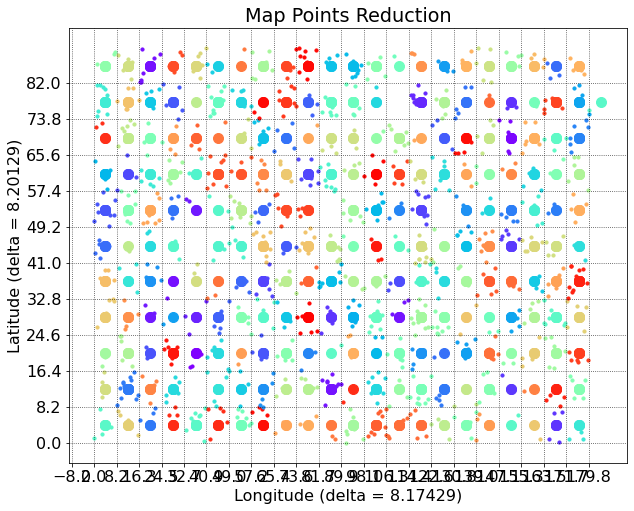

MAP POINTS REDUCTION RESULT:
       latitude  longitude    lat_mid    lon_mid
0    36.556811  81.821974  36.784298  86.113563
1    24.848445  34.669687  28.610010  36.905813
2    82.603665  17.048337  85.830029  20.503229
3    49.197439  50.166875  44.958586  53.308396
4    79.289560  78.065388  77.655740  77.912272
..         ...        ...        ...        ...
995  80.452919  53.980157  77.655740  53.308396
996  75.849397  43.124779  77.655740  45.107105
997  84.222609  95.555304  85.830029  94.314855
998  64.265298   0.194815  61.307163   4.100646
999  24.593131  93.222549  20.435721  94.314855

[1000 rows x 4 columns]


In [21]:
result_r1 = mpr_r1.mapPointReduce(data=data_df_r1, plot=True)
print("MAP POINTS REDUCTION RESULT:\n", result_r1)